<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/Project_Based_Learning_kelompok_3_cs03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git

fatal: destination path 'bitlabs-project' already exists and is not an empty directory.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore

import pandas as pd


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_transaction.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_request.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__promotion.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv')



In [ ]:
df1.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498


In [ ]:
df2.head()

,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN


In [ ]:
df3.head()

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,492c51e6c6a4392b2758d93961bee0a778b42151644ebc...,VISAPPRNC,PAPERVISA - Non Corporate,16344.00
1,35f36305f75d6878d2faef1d65872b3110d2cc67308839...,VISAPPRSCNC,VISAPAPER Supply-Chain Non Corporate,14375.00
2,35f36305f75d6878d2faef1d65872b3110d2cc67308839...,VISAPPRSCNC,VISAPAPER Supply-Chain Non Corporate,75816.25
3,877cbc48ac832c9f872a12d06d949376f0d918ad48868d...,PPRMAYN2,Promo Loyalty Mei 2,450000.00
4,0a77054fc75a9d6dbb33ae4be6e3420e557715ef8c3a2a...,PPRMARF1,MERIAH-1,499800.00


In [ ]:
df4.head()

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime,missing_data_flag,inconsistency_flag
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59,0,1
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10,0,0
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29,0,0
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00,0,0
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58,0,0


**Missing Values**



DF1

In [ ]:
# Mengganti nilai NaN di semua kolom df1 dengan 'unknown'
df1.fillna('unknown', inplace=True)

# Memeriksa hasil akhir dan menampilkan dalam format tabel menggunakan tabulate
print("DataFrame df1 setelah mengganti nilai NaN dengan 'unknown':")
print(tabulate(df1.head(), headers='keys', tablefmt='psql'))

df_cleaned = df1[df1['dpt_promotion_id'] != 'unknown']

#Menyimpan DataFrame yang telah dibersihkan ke dataset baru
df_cleaned.to_csv('cleaned_dataset.csv', index=False)  # Simpan sebagai file CSV



DataFrame df1 setelah mengganti nilai NaN dengan 'unknown':
+----+------------------------------------------------------------------+--------------------+------------------------------------------------------------------+------------------------------------------------------------------+----------------------+--------------------------+-------------------------+--------------------------------+--------------------------------+
|    | dpt_id                                                           | dpt_promotion_id   | buyer_id                                                         | seller_id                                                        |   transaction_amount | payment_method_name      | payment_provider_name   | transaction_created_datetime   | transaction_updated_datetime   |
|----+------------------------------------------------------------------+--------------------+------------------------------------------------------------------+-------------------------------------

df3

In [ ]:

# Mengganti nilai NaN di kolom dpt_promotion_id, promotion_code, dan promotion_name dengan 'unknown'
df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']] = df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].fillna('unknown')

# Memeriksa hasil penggantian NaN
print("DataFrame df3 setelah mengganti NaN dengan 'unknown':")
print(tabulate(df3.head(), headers='keys', tablefmt='psql'))

# Menghapus baris dengan nilai 'unknown' pada kolom yang disebutkan
df3 = df3[~df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].isin(['unknown']).any(axis=1)]

# Menghapus baris dengan nilai 0.0 pada kolom transaction_promo_cashback_amount
df3 = df3[df3['transaction_promo_cashback_amount'] != 0.0]

# Memeriksa hasil akhir dan menampilkan dalam format tabel menggunakan tabulate
print("DataFrame df3 setelah menghapus nilai 'unknown' dan 0.0:")
print(tabulate(df3.head(), headers='keys', tablefmt='psql'))

df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']] = df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].fillna('unknown')


# Menyimpan DataFrame ke file CSV yang sudah ada di Google Drive, tanpa menambahkan file CSV yang baru
df3.to_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__promotion.csv', index=False)


DataFrame df3 setelah mengganti NaN dengan 'unknown':
+----+------------------------------------------------------------------+------------------+--------------------------------------+-------------------------------------+
|    | dpt_promotion_id                                                 | promotion_code   | promotion_name                       |   transaction_promo_cashback_amount |
|----+------------------------------------------------------------------+------------------+--------------------------------------+-------------------------------------|
|  0 | 492c51e6c6a4392b2758d93961bee0a778b42151644ebc4581847935d4a56119 | VISAPPRNC        | PAPERVISA - Non Corporate            |                             16344   |
|  1 | 35f36305f75d6878d2faef1d65872b3110d2cc67308839088d56575589bdc4cf | VISAPPRSCNC      | VISAPAPER Supply-Chain Non Corporate |                             14375   |
|  2 | 35f36305f75d6878d2faef1d65872b3110d2cc67308839088d56575589bdc4cf | VISAPPRSCNC      | VIS

df4

In [ ]:
import pandas as pd
import os
from tabulate import tabulate

# Menandai baris dengan nilai yang hilang dalam kolom penting
df4['missing_data_flag'] = df4[['user_fraud_flag', 'blacklist_account_flag']].isna().any(axis=1)

# Mengidentifikasi ketidaksesuaian dalam kolom penting
df4['inconsistency_flag'] = (df4['user_fraud_flag'] == 1) & (df4['blacklist_account_flag'] != 1)

# Mengubah nilai boolean menjadi integer (0 dan 1)
df4['missing_data_flag'] = df4['missing_data_flag'].astype(int)
df4['inconsistency_flag'] = df4['inconsistency_flag'].astype(int)

# Mengidentifikasi nilai yang hilang (NaN) dalam kolom penting
missing_data = df4[['user_fraud_flag', 'blacklist_account_flag']].isna().sum()
print("Missing Data Count:")
print(missing_data)
print("\nPercentage of Missing Data:")
print((missing_data / len(df4) * 100).round(2))

# Menyimpan kembali dataframe dengan flag ke file CSV lama
file_path = "/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv"
if os.path.exists(file_path):
    df4.to_csv(file_path, index=False)
    print(f"\nFile updated successfully: {file_path}")
else:
    print(f"File not found: {file_path}")

# Menampilkan hasil dalam format tabel menggunakan tabulate
rows_with_missing_data = df4[df4['missing_data_flag'] == 1]
inconsistencies = df4[df4['inconsistency_flag'] == 1]

if not rows_with_missing_data.empty:
    print("\nMissing Data in Key Fraud-Related Columns (Top 10 Rows):")
    print(tabulate(rows_with_missing_data[['user_fraud_flag', 'blacklist_account_flag', 'missing_data_flag']].head(10), headers='keys', tablefmt='psql'))
else:
    print("\nNo missing data in key fraud-related columns.")

if not inconsistencies.empty:
    print("\nInconsistencies in Key Fraud-Related Columns (Top 10 Rows):")
    print(tabulate(inconsistencies[['user_fraud_flag', 'blacklist_account_flag', 'inconsistency_flag']].head(10), headers='keys', tablefmt='psql'))
else:
    print("\nNo inconsistencies found in key fraud-related columns.")


Missing Data Count:
user_fraud_flag           0
blacklist_account_flag    0
dtype: int64

Percentage of Missing Data:
user_fraud_flag           0.0
blacklist_account_flag    0.0
dtype: float64

File updated successfully: /content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv

No missing data in key fraud-related columns.

Inconsistencies in Key Fraud-Related Columns (Top 10 Rows):
+-----+-------------------+--------------------------+----------------------+
|     |   user_fraud_flag |   blacklist_account_flag |   inconsistency_flag |
|-----+-------------------+--------------------------+----------------------|
|   0 |                 1 |                        0 |                    1 |
|  30 |                 1 |                        0 |                    1 |
|  34 |                 1 |                        0 |                    1 |
|  55 |                 1 |                        0 |                    1 |
|  57 |                 1 |                    

future enggenering

Buyer-Seller Relationship Score

In [ ]:
# 1. Menghitung frekuensi interaksi dan volume transaksi
interaction_counts = df1.groupby(['buyer_id', 'seller_id']).size().reset_index(name='transaction_count')
interaction_volumes = df1.groupby(['buyer_id', 'seller_id'])['transaction_amount'].sum().reset_index(name='total_volume')

# 2. Menggabungkan frekuensi dan volume transaksi
interaction_summary = pd.merge(interaction_counts, interaction_volumes, on=['buyer_id', 'seller_id'])

# 3. Normalisasi ke persentase
interaction_summary['transaction_count_percent'] = 100 * interaction_summary['transaction_count'] / interaction_summary['transaction_count'].max()
interaction_summary['total_volume_percent'] = 100 * interaction_summary['total_volume'] / interaction_summary['total_volume'].max()

# 4. Menghitung Relationship Score dalam persentase
interaction_summary['relationship_score'] = (interaction_summary['transaction_count_percent'] + interaction_summary['total_volume_percent']) / 2

# 5. Menggunakan DBSCAN untuk deteksi anomali
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2, min_samples=5)
interaction_summary['anomaly'] = model.fit_predict(interaction_summary[['relationship_score']])

# 6. Mengubah label anomali ke 1 (anomali) dan 0 (bukan anomali)
interaction_summary['anomaly'] = interaction_summary['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# 7. Menyaring anomali (label 1 berarti anomali)
anomalies = interaction_summary[interaction_summary['anomaly'] == 1]

# 8. Menampilkan 5 baris teratas dari ringkasan dan anomali
from tabulate import tabulate
print("Summary of Buyer-Seller Relationships (Top 5 Rows):")
print(tabulate(interaction_summary[['buyer_id', 'seller_id', 'transaction_count_percent', 'total_volume_percent', 'relationship_score', 'anomaly']].head(), headers='keys', tablefmt='psql'))

print("\nAnomalies in Buyer-Seller Relationships (Top 5 Rows):")
print(tabulate(anomalies[['buyer_id', 'seller_id', 'transaction_count_percent', 'total_volume_percent', 'relationship_score']].head(), headers='keys', tablefmt='psql'))

df1.to_csv('Buyer-Seller Relationship Score.csv', index=False)

Summary of Buyer-Seller Relationships (Top 5 Rows):
+----+------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------+------------------------+----------------------+-----------+
|    | buyer_id                                                         | seller_id                                                        |   transaction_count_percent |   total_volume_percent |   relationship_score |   anomaly |
|----+------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------+------------------------+----------------------+-----------|
|  0 | 00048ebf5503ef1dfb03eec05312583eeb2b57320ac6823710631e7d77ea36c5 | 00048ebf5503ef1dfb03eec05312583eeb2b57320ac6823710631e7d77ea36c5 |                   0.157978  |            0.00124999  |            0.0796139 |         0 |
|  1 | 001046b5061e28476

Transaction Frequency Metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from tabulate import tabulate

#revisi kode dan ganti dbscan nya

# Reset index to make 'transaction_created_datetime' a column again
df1 = df1.reset_index()

# Mengubah kolom transaction_created_datetime menjadi tipe datetime
df1['transaction_created_datetime'] = pd.to_datetime(df1['transaction_created_datetime'])

# Atur index pada kolom transaction_created_datetime untuk analisis time series
# df1.set_index('transaction_created_datetime', inplace=True) # This line is not needed and caused the confusion

# Hitung frekuensi transaksi harian, menambahkan buyer_id untuk setiap transaksi
daily_transactions = df1.groupby([df1['transaction_created_datetime'].dt.date, 'buyer_id']).size().reset_index(name='transaction_count')
# Rename the date column directly in the groupby for clarity
daily_transactions.rename(columns={'transaction_created_datetime': 'transaction_date'}, inplace=True)

# Mengidentifikasi lonjakan aktivitas (bursts) dan jeda yang tidak biasa (gaps) menggunakan DBSCAN
# Menyiapkan data untuk DBSCAN
daily_transactions['day_of_year'] = pd.to_datetime(daily_transactions['transaction_date']).dt.dayofyear # Use the correct column name here
X = daily_transactions[['day_of_year', 'transaction_count']]

# Menerapkan DBSCAN
db = DBSCAN(eps=2, min_samples=5).fit(X)
daily_transactions['anomaly'] = db.labels_

# Menyaring transaksi yang merupakan anomali (label = -1)
anomalies = daily_transactions[daily_transactions['anomaly'] == -1]

# Mengelompokkan anomali berdasarkan hari untuk menemukan bursts atau gaps
anomaly_summary = anomalies.groupby(anomalies['transaction_date']).size().reset_index(name='anomaly_count') # Use the correct column name here

# Tampilkan hasil anomali dalam format tabel menggunakan tabulate
print("Anomalies in Transaction Frequency with Buyer ID:")
print(tabulate(anomalies, headers='keys', tablefmt='psql'))

print("\nDaily Summary of Anomalies (Bursts or Gaps):")
print(tabulate(anomaly_summary, headers='keys', tablefmt='psql'))

Anomalies in Transaction Frequency with Buyer ID:
+-------+--------------------+------------------------------------------------------------------+---------------------+---------------+-----------+
|       | transaction_date   | buyer_id                                                         |   transaction_count |   day_of_year |   anomaly |
|-------+--------------------+------------------------------------------------------------------+---------------------+---------------+-----------|
|   951 | 2023-01-24         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                  15 |            24 |        -1 |
|  1009 | 2023-01-25         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                  15 |            25 |        -1 |
|  1099 | 2023-01-27         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                   8 |            27 |        -1 |
|  1158 | 2023-01-28         | 0bb440f2ae8461ca7b424f9b0efddbb

In [ ]:
buyer_promo_usage = (
    df1.loc[df1['dpt_promotion_id'].notna() &
            (df1['dpt_promotion_id'] != '') &
            (df1['dpt_promotion_id'] != 'unknown')]
    .assign(buyer_promo_pair=lambda x: x['buyer_id'].astype(str) + ' - ' + x['dpt_promotion_id'])
    .groupby('buyer_promo_pair')
    .size()
    .reset_index(name='usage_count')
)

buyer_promo_usage

,buyer_promo_pair,usage_count
0,0026eba831da3b7127429ffef8fcef0f96b547f5c7fab0...,1
1,002ead1395e772dedbb47368fcbe317e14987e5f991221...,1
2,002ead1395e772dedbb47368fcbe317e14987e5f991221...,1
3,002ead1395e772dedbb47368fcbe317e14987e5f991221...,2
4,0104836daa6e1e44af47e550530b445a46ff5f21dc3464...,1
...,...,...
869,ff6660f9715659549d6e2f67c3816258f487865b255b81...,1
870,ffa585acc35ab320a44e0b6f22de0f8225058fa21b18d7...,1
871,ffbd0dca96a261f771d67e40d9d5be546a5180b1043a7a...,1
872,ffd999c933c180fad23caeaf5336da950553b5f4f0b6e3...,1


scaling dan normaliisasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Pastikan kolom datetime sudah dalam format datetime
df1[['transaction_created_datetime', 'transaction_updated_datetime']] = df1[['transaction_created_datetime', 'transaction_updated_datetime']].apply(pd.to_datetime)

# Hitung selisih waktu dalam detik
df1['time_difference'] = (df1['transaction_updated_datetime'] - df1['transaction_created_datetime']).dt.total_seconds()

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Terapkan RobustScaler pada transaction_amount dan time_difference
df1[['scaled_transaction_amount', 'scaled_time_difference']] = pd.DataFrame(scaler.fit_transform(df1[['transaction_amount', 'time_difference']]), index=df1.index)

# Tampilkan beberapa baris hasil
print(df1.head())

                                              dpt_id dpt_promotion_id  \
0  69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...          unknown   
1  961d6f7efde3622da8f35e76e2b53acd84c647a661de86...          unknown   
2  6441defc089b4ae947cce529904a5c7db2326ede52bdaa...          unknown   
3  64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...          unknown   
4  ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...          unknown   

                                            buyer_id  \
0  bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...   
1  09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...   
2  25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...   
3  5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...   
4  5c19a13a9b229340b584f621b648f4dec7491e12368392...   

                                           seller_id  transaction_amount  \
0  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             20380.0   
1  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             14673.6

EDA

Statistik Deskriptif Sebelum Transformasi:
count    5.000000e+04
mean     1.965125e+07
std      1.057004e+08
min      0.000000e+00
25%      7.000043e+04
50%      1.850172e+06
75%      1.398597e+07
max      2.014010e+10
Name: transaction_amount, dtype: float64

Statistik Deskriptif Setelah Transformasi Log:
count    50000.000000
mean        13.979154
std          2.986957
min          0.000000
25%         11.156271
50%         14.430790
75%         16.453566
max         23.725979
Name: log_transaction_amount, dtype: float64


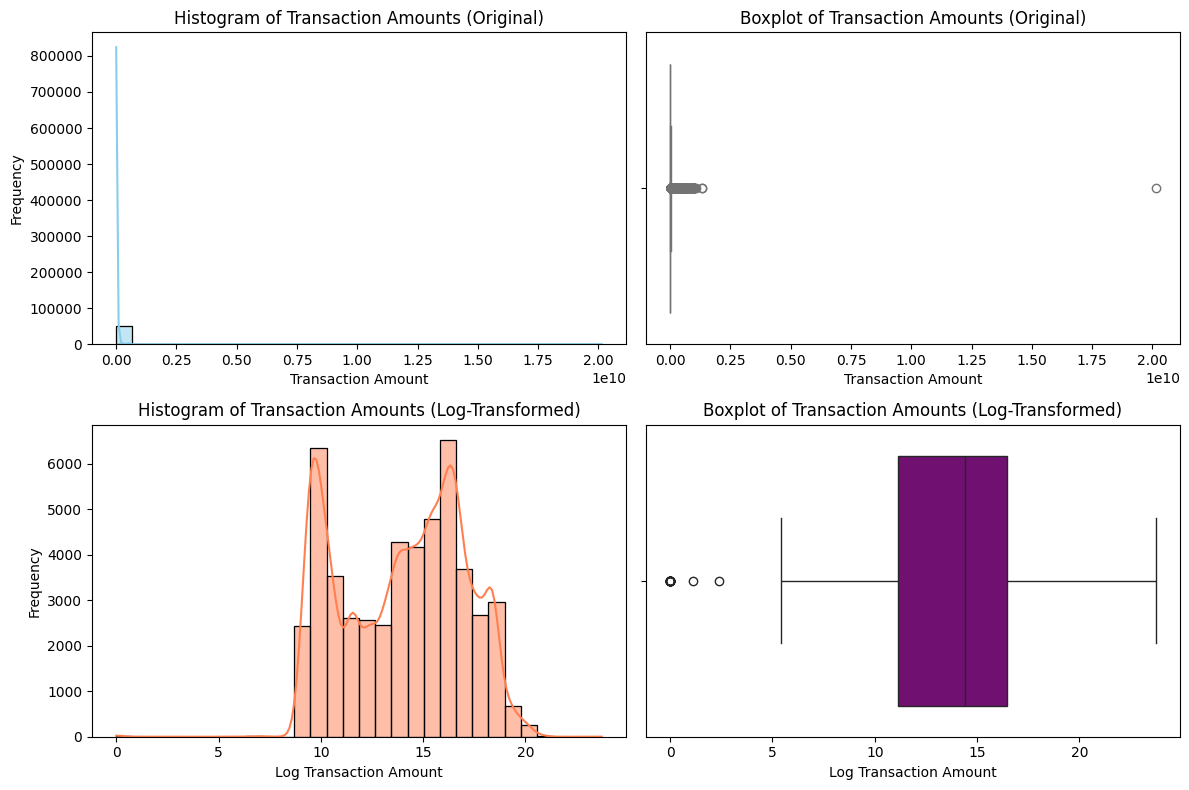


Jumlah Outlier pada Data Log-Transformed: 28
Outliers pada Data Log-Transformed:
                                                  dpt_id dpt_promotion_id  \
1105   fa13dbf2216b698423da8348dc33385c5b83162be6af80...          unknown   
1979   f3643af0f67afeacdce531ba6d4640cc27f4d5c0712e30...          unknown   
2433   a3ce2c6370963b52fda8da00d99a86c0e5e0b9c5df902d...          unknown   
3531   d9bf12137c29d2dd2a3699c40ccf647f06da6703f7d5eb...          unknown   
4705   b37439a1be27fc885fdcb7f775ff4a441851e877cd4928...          unknown   
4992   ddb870db20eabc6ea5361a5f2ccf922f7e5b03d21113fe...          unknown   
5659   43da8e6442dfb08701fefd13faf417c2d859f92fed5c3a...          unknown   
10703  011a1ddb9e7768d220023ff10bae830bd45701a4042c5d...          unknown   
12184  4ea7b13931a77afc95c25387dde1a1c64c76d7784dc1a5...          unknown   
13302  f5cb3c68b3b76c04d56dae8fccb282bea33842b16fd471...          unknown   
13712  e328375804af69a93127664f6817c3e7215251791109ec...          unkno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# Analisis statistik dasar
print("Statistik Deskriptif Sebelum Transformasi:")
print(df1['transaction_amount'].describe())

# Transformasi log pada transaction_amount
df1['log_transaction_amount'] = np.log1p(df1['transaction_amount'])  # log1p = log(1 + x)

print("\nStatistik Deskriptif Setelah Transformasi Log:")
print(df1['log_transaction_amount'].describe())

# Visualisasi distribusi sebelum dan sesudah transformasi
plt.figure(figsize=(12, 8))

# Histogram sebelum transformasi
plt.subplot(2, 2, 1)
sns.histplot(df1['transaction_amount'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Transaction Amounts (Original)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# Boxplot sebelum transformasi
plt.subplot(2, 2, 2)
sns.boxplot(x=df1['transaction_amount'], color='lightgreen')
plt.title("Boxplot of Transaction Amounts (Original)")
plt.xlabel("Transaction Amount")

# Histogram setelah transformasi log
plt.subplot(2, 2, 3)
sns.histplot(df1['log_transaction_amount'], bins=30, kde=True, color='coral')
plt.title("Histogram of Transaction Amounts (Log-Transformed)")
plt.xlabel("Log Transaction Amount")
plt.ylabel("Frequency")

# Boxplot setelah transformasi log
plt.subplot(2, 2, 4)
sns.boxplot(x=df1['log_transaction_amount'], color='purple')
plt.title("Boxplot of Transaction Amounts (Log-Transformed)")
plt.xlabel("Log Transaction Amount")

plt.tight_layout()
plt.show()

# Identifikasi outlier pada data log-transformed menggunakan IQR
Q1 = df1['log_transaction_amount'].quantile(0.25)
Q3 = df1['log_transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

log_outliers = df1[
    (df1['log_transaction_amount'] < lower_bound) |
    (df1['log_transaction_amount'] > upper_bound)
]
print(f"\nJumlah Outlier pada Data Log-Transformed: {len(log_outliers)}")

# Display outliers pada data log-transformed
if not log_outliers.empty:
    print("Outliers pada Data Log-Transformed:")
    print(log_outliers)


Top 10 Buyer-Seller Pairs:
                                   buyer_seller_pair  frequency
0  0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...       1266
1  10f3200ad77826457a7b33726d1ec95de21ee6400745aa...        321
2  34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...        294
3  b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...        294
4  9506dece8982a8d50fbb2924dd510825ea1516c19852aa...        261
5  2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...        248
6  df43724682fbd651e549d3e2043a9d0d2cc4700545863a...        243
7  02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...        216
8  df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...        215
9  0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...        210


<ipython-input-9-ff96a4b8f0dd>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


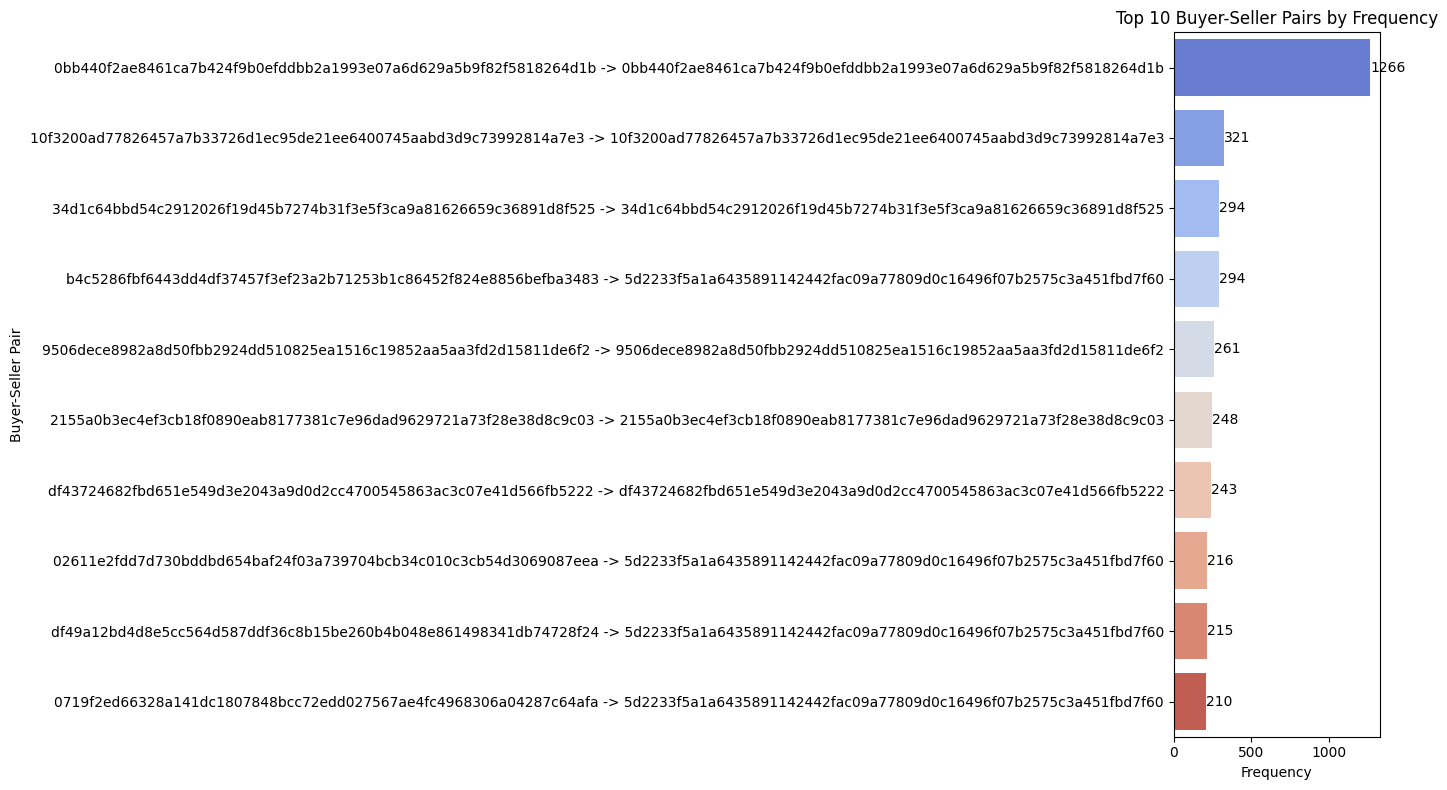

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# Menggabungkan buyer_id dan seller_id menjadi pasangan unik
df1['buyer_seller_pair'] = df1['buyer_id'].astype(str) + ' -> ' + df1['seller_id'].astype(str)

# Menghitung frekuensi setiap pasangan
pair_frequencies = df1['buyer_seller_pair'].value_counts().reset_index()
pair_frequencies.columns = ['buyer_seller_pair', 'frequency']

# Menampilkan pasangan dengan frekuensi tertinggi
print("Top 10 Buyer-Seller Pairs:")
print(pair_frequencies.head(10))

# Visualisasi pasangan dengan frekuensi tertinggi
top_n = 10  # Jumlah pasangan teratas yang akan divisualisasikan
top_pairs = pair_frequencies.head(top_n)

plt.figure(figsize=(14, 8))
sns.barplot(
    x='frequency',
    y='buyer_seller_pair',
    data=top_pairs,
    palette='coolwarm'  # Warna berdasarkan skala
)
plt.title(f"Top {top_n} Buyer-Seller Pairs by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Buyer-Seller Pair")

# Menambahkan label frekuensi pada setiap bar
for index, value in enumerate(top_pairs['frequency']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


Top 10 Promotions by Usage (From Promotion Data Only):
                                        promotion_id  usage_count  \
0  35f36305f75d6878d2faef1d65872b3110d2cc67308839...          243   
1  492c51e6c6a4392b2758d93961bee0a778b42151644ebc...           88   
2  5d3e45d5b4c07e500c01f4cc67e001a1e932c44ff00995...           36   
3  1aeb4f8e2bcd20d40daaf7579a53477e4547aee7741055...           36   
4  46fa888c3ac2a995f1d89bf368601e1bc18cbf8fb3bfd0...           23   
5  30d63dbcd536c2d5f020f5f630b78445b8e07efc10bdb7...           19   
6  8526bd4c62d888dd381656707925a20f464b6c87ca1512...           19   
7  de847ccdb093e634d843167496d6f72d1de5607e9cf6a8...           15   
8  0637b376c44d6c27b5f716b819fe330812b7727e37abec...           14   
9  2ac3c19644378cc9a5c3161b70f76dbe8225a808be9f82...           14   

                                    dpt_promotion_id  \
0  35f36305f75d6878d2faef1d65872b3110d2cc67308839...   
1  492c51e6c6a4392b2758d93961bee0a778b42151644ebc...   
2  5d3e45d5b4c07e

<ipython-input-7-7c9e8cf4570a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


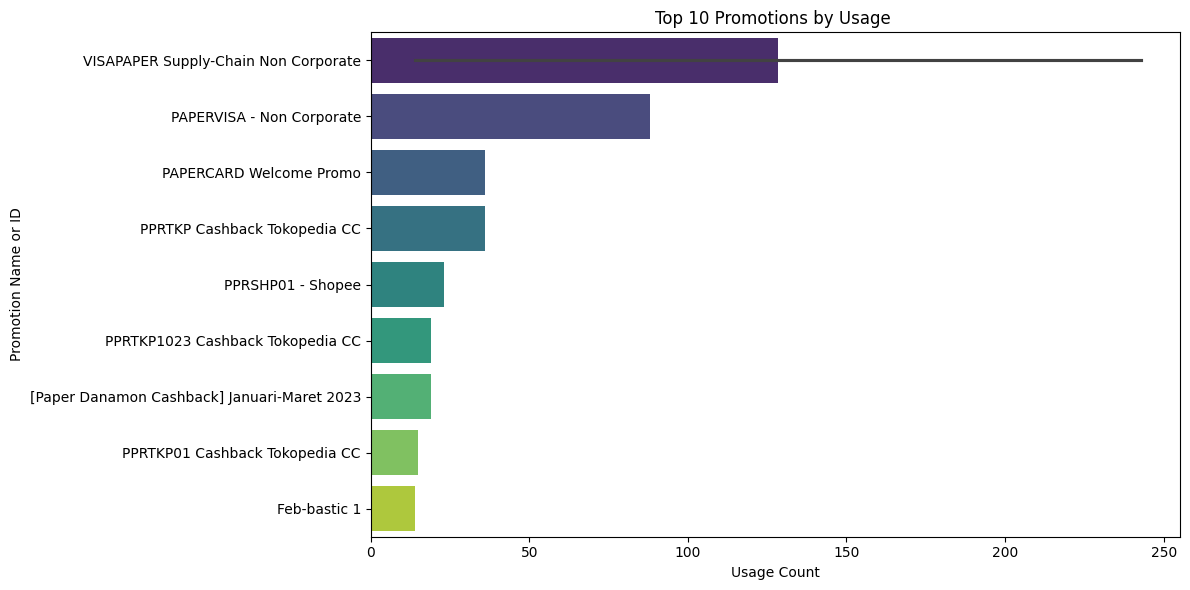

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data df3
# df3 = pd.read_csv('path_to_your_file_promotions.csv')

# Filter untuk mengecualikan nilai 'unknown', NaN, atau string kosong
filtered_df3 = df3[~df3['dpt_promotion_id'].isin(['unknown', '', None])]

# Menghitung jumlah penggunaan tiap promosi (jumlah munculnya ID promosi)
promotion_usage = filtered_df3['dpt_promotion_id'].value_counts().reset_index()
promotion_usage.columns = ['promotion_id', 'usage_count']

# Gabungkan dengan nama promosi jika diperlukan
promotion_usage = promotion_usage.merge(
    df3[['dpt_promotion_id', 'promotion_name']].drop_duplicates(),
    left_on='promotion_id',
    right_on='dpt_promotion_id',
    how='left'
)

# Gunakan nama promosi jika tersedia, jika tidak gunakan ID
promotion_usage['label'] = promotion_usage['promotion_name'].fillna(promotion_usage['promotion_id'])

# Menampilkan 10 promosi teratas berdasarkan penggunaan
print("Top 10 Promotions by Usage (From Promotion Data Only):")
print(promotion_usage.head(10))

# Visualisasi promosi dengan penggunaan terbanyak
top_n = 10  # Jumlah promosi teratas yang akan divisualisasikan
top_promotions = promotion_usage.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='usage_count',
    y='label',  # Menggunakan nama promosi atau ID sebagai label
    data=top_promotions,
    palette='viridis'  # Warna berdasarkan skala
)
plt.title(f"Top {top_n} Promotions by Usage ")
plt.xlabel("Usage Count")
plt.ylabel("Promotion Name or ID")
plt.tight_layout()
plt.show()


Top 10 Repeated Transactions:
                                   buyer_seller_pair  transaction_count
0  0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...               1266
1  10f3200ad77826457a7b33726d1ec95de21ee6400745aa...                321
2  34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...                294
3  b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...                294
4  9506dece8982a8d50fbb2924dd510825ea1516c19852aa...                261
5  2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...                248
6  df43724682fbd651e549d3e2043a9d0d2cc4700545863a...                243
7  02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...                216
8  df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...                215
9  0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...                210


<ipython-input-11-b4d4a04c4e1b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


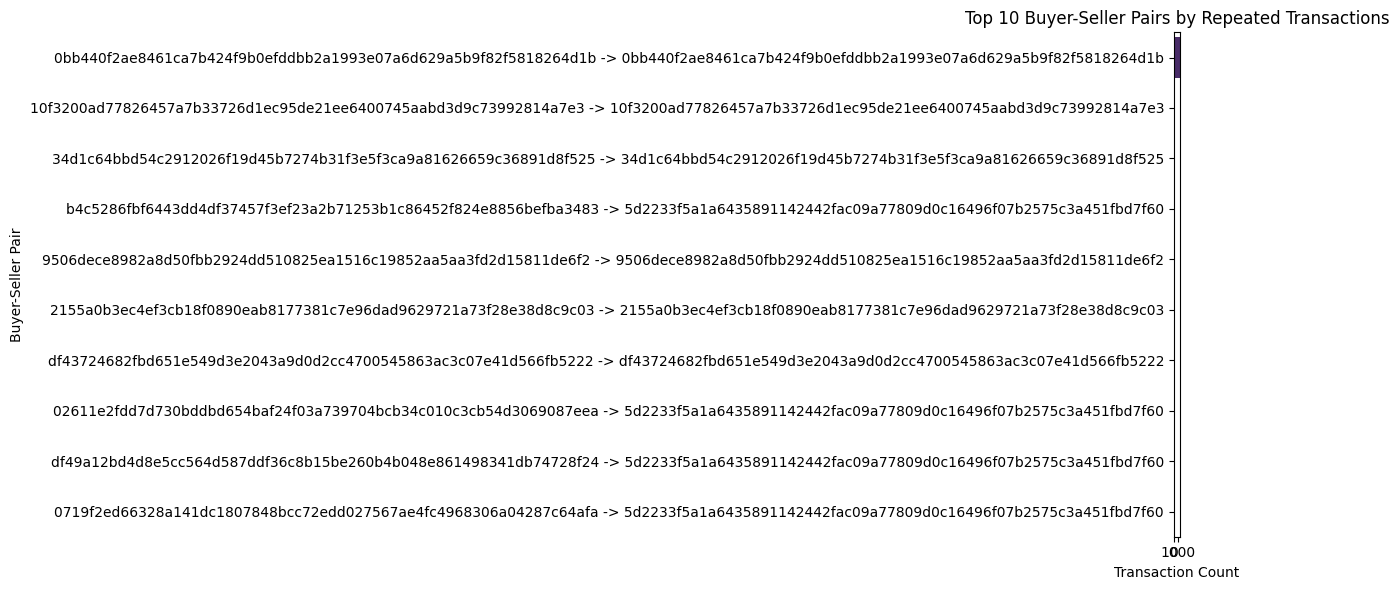


Descriptive Statistics for Transaction Amounts:
count    5.000000e+04
mean     1.965125e+07
std      1.057004e+08
min      0.000000e+00
25%      7.000043e+04
50%      1.850172e+06
75%      1.398597e+07
max      2.014010e+10
Name: transaction_amount, dtype: float64

Number of Abnormally High Transactions: 6777

Abnormally High Transactions:
    transaction_amount                                           buyer_id  \
12        9.999939e+07  4e748c692460aa2d2f08354ea0ef0b2146addf170d4c6a...   
14        8.470973e+08  ffcb909cf0b66998e1f034d00ed93b65350b1defddd6e2...   
17        1.015500e+08  ecad68c6f8f865f785578f9be9fde7916f2f598858c28d...   
22        2.500000e+08  b958f0abcc3036f39ef281236179d70aa1f6e44c9775cf...   
31        5.216400e+07  19fb72a33fb7d746ea5049eb55a7399479614bd8eb4eaf...   
34        9.739200e+07  1cd7c6221d8919d6b0113eb17ab64ec31442189a6e635a...   
36        2.089885e+08  a19057a27b5d3caa27312d3636a207a7a67bbf0e3b66cb...   
47        9.951900e+07  e79b75b9a9d195ee7

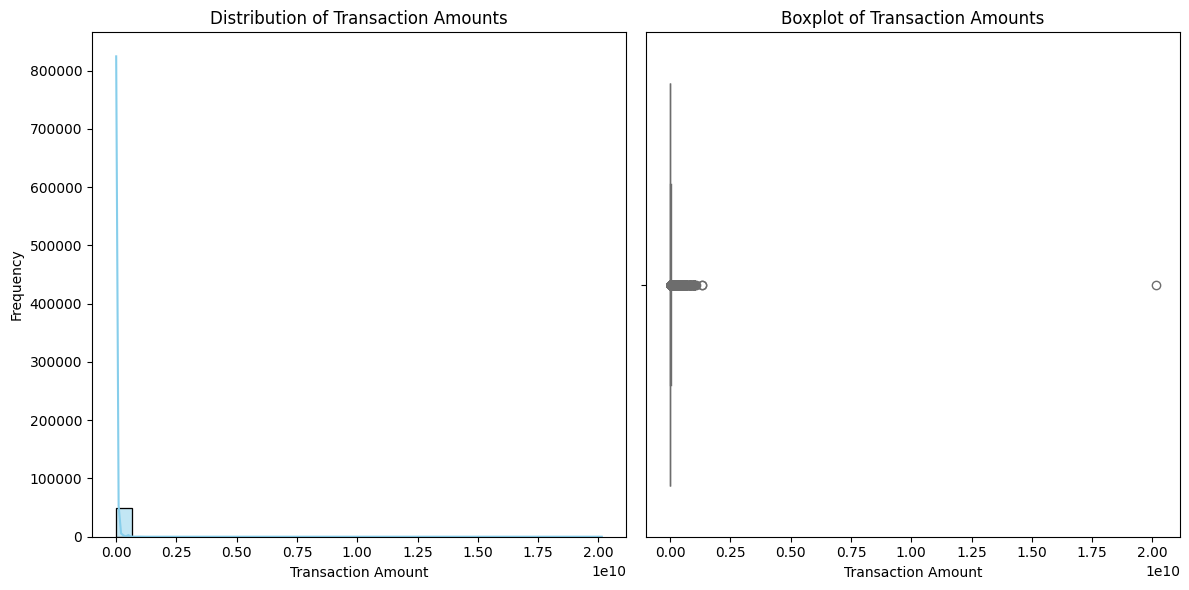

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# ==============================
# 1. Repeated Transactions
# ==============================

# Menggabungkan buyer_id dan seller_id untuk membuat pasangan unik
df1['buyer_seller_pair'] = df1['buyer_id'].astype(str) + ' -> ' + df1['seller_id'].astype(str)

# Menghitung jumlah transaksi untuk setiap pasangan
pair_transaction_counts = df1['buyer_seller_pair'].value_counts().reset_index()
pair_transaction_counts.columns = ['buyer_seller_pair', 'transaction_count']

# Menampilkan pasangan dengan transaksi tertinggi
print("Top 10 Repeated Transactions:")
print(pair_transaction_counts.head(10))

# Visualisasi pasangan dengan transaksi berulang tertinggi
top_n_repeated = 10
top_repeated_pairs = pair_transaction_counts.head(top_n_repeated)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='transaction_count',
    y='buyer_seller_pair',
    data=top_repeated_pairs,
    palette='viridis'
)
plt.title(f"Top {top_n_repeated} Buyer-Seller Pairs by Repeated Transactions")
plt.xlabel("Transaction Count")
plt.ylabel("Buyer-Seller Pair")
plt.tight_layout()
plt.show()

# ==============================
# 2. Abnormally High Transaction Values
# ==============================

# Statistik deskriptif untuk transaction_amount
print("\nDescriptive Statistics for Transaction Amounts:")
print(df1['transaction_amount'].describe())

# Menggunakan IQR untuk mendeteksi transaksi dengan nilai sangat tinggi
Q1 = df1['transaction_amount'].quantile(0.25)
Q3 = df1['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Menyaring transaksi yang abnormally high
high_transactions = df1[df1['transaction_amount'] > upper_bound]

print("\nNumber of Abnormally High Transactions:", len(high_transactions))
print("\nAbnormally High Transactions:")
print(high_transactions[['transaction_amount', 'buyer_id', 'seller_id']].head(10))

# Visualisasi distribusi nilai transaksi
plt.figure(figsize=(12, 6))

# Histogram untuk semua nilai transaksi
plt.subplot(1, 2, 1)
sns.histplot(df1['transaction_amount'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# Boxplot untuk mendeteksi nilai tinggi
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['transaction_amount'], color='salmon')
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("Transaction Amount")

plt.tight_layout()
plt.show()


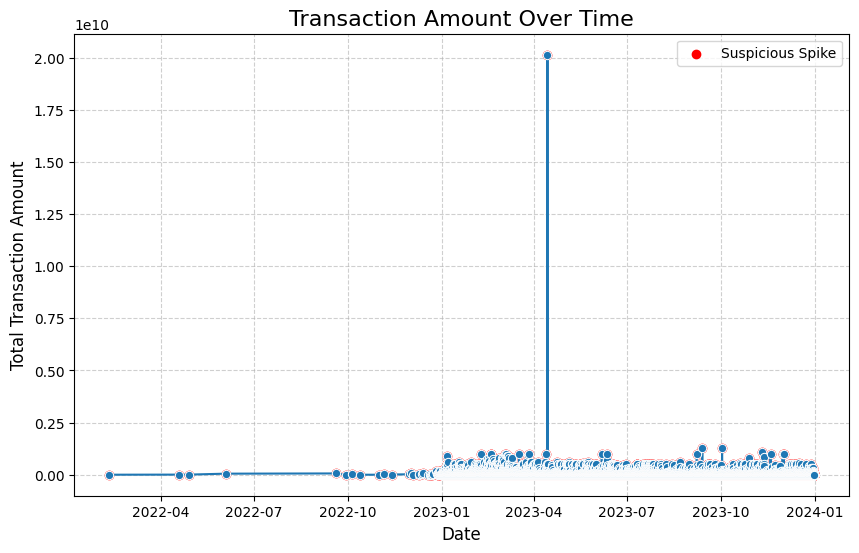

Suspicious Spikes Detected:
      transaction_created_datetime  \
0       2022-02-09 13:00:04.571591   
1       2022-04-18 15:34:13.027719   
2       2022-04-28 10:02:25.820418   
3       2022-06-03 17:03:27.836960   
4       2022-09-19 17:58:05.389664   
...                            ...   
49995   2023-12-30 23:01:54.834531   
49996   2023-12-30 23:07:19.311364   
49997   2023-12-30 23:32:03.866110   
49998   2023-12-30 23:35:36.777571   
49999   2023-12-30 23:41:33.008217   

                                                  dpt_id dpt_promotion_id  \
0      cc3fd409b2797f649b3edc17bb18b9aab6f7c9d79ce571...          unknown   
1      52a53df842245e0d96c3f2ca1253ef9d01491051b15b4b...          unknown   
2      5f6d6616efbe3e2210a3e9451711413a6e652d6e941027...          unknown   
3      4bfc6e221e2556bc40241faf15d87d2ca153493ad7d021...          unknown   
4      6d58b55de5b04268eb0ff4bbc42f816ceadf89971502d0...          unknown   
...                                                  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pastikan kolom 'transaction_created_datetime' ada di tipe datetime
df1['transaction_created_datetime'] = pd.to_datetime(df1['transaction_created_datetime'])

# 2. Agregasi data berdasarkan tanggal
daily_transactions = df1.groupby('transaction_created_datetime').sum().reset_index()

# 3. Plot data
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_transactions, x='transaction_created_datetime', y='transaction_amount', marker='o')
plt.title("Transaction Amount Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# 4. Highlight Suspicious Spikes
threshold = 1000  # Threshold untuk lonjakan mencurigakan
suspicious_data = daily_transactions[daily_transactions['transaction_amount'] > threshold]

# Tandai lonjakan di grafik
plt.scatter(
    suspicious_data['transaction_created_datetime'],
    suspicious_data['transaction_amount'],
    color='red',
    label='Suspicious Spike'
)
plt.legend()
plt.show()

# 5. Tampilkan rincian lonjakan mencurigakan
print("Suspicious Spikes Detected:")
print(suspicious_data)


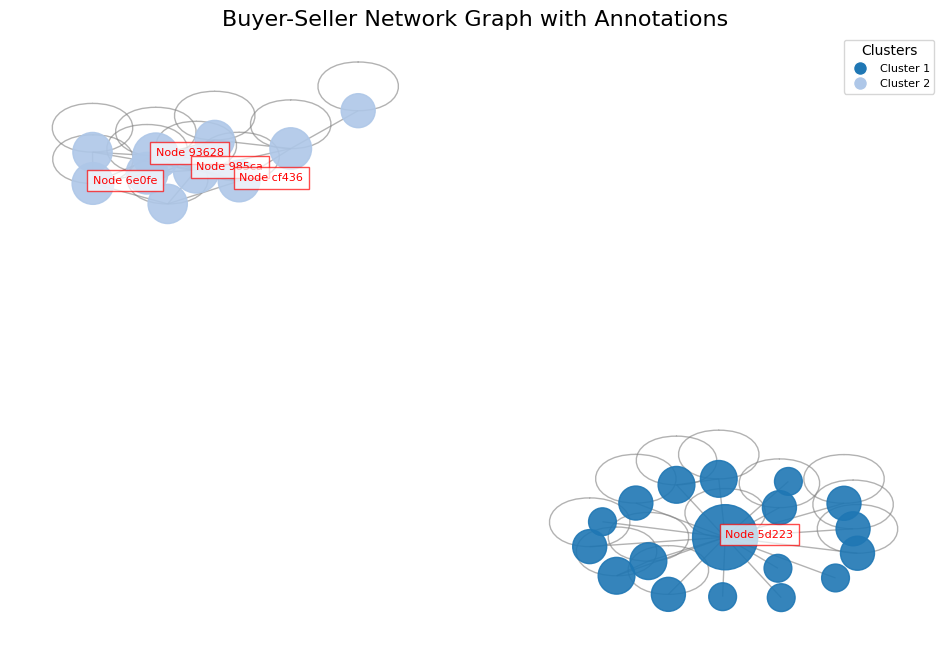

Original Graph - Nodes: 9845, Edges: 10349
Filtered Graph - Nodes: 28, Edges: 60


In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Ambil data buyer_id dan seller_id dari df1
buyer_seller_data = df1[['buyer_id', 'seller_id']]

# 2. Buat graf dengan NetworkX
G = nx.Graph()
edges = list(buyer_seller_data.itertuples(index=False, name=None))
G.add_edges_from(edges)

# 3. Filter node berdasarkan degree threshold
degree_threshold = 5  # Threshold degree untuk filter
filtered_nodes = [node for node in G.nodes if G.degree(node) >= degree_threshold]
H = G.subgraph(filtered_nodes)  # Subgraf hanya untuk node yang difilter

# 4. Identifikasi komponen terhubung
connected_components = list(nx.connected_components(H))
colors = plt.cm.tab20.colors  # Palet warna
color_map = {node: colors[i % len(colors)] for i, component in enumerate(connected_components) for node in component}

# 5. Visualisasi graf
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(H, seed=42)

# Node size dan color
node_sizes = [300 + 100 * H.degree(node) for node in H.nodes]
node_colors = [color_map[node] for node in H.nodes]

nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.6)

# Tampilkan anotasi untuk node dengan degree tertinggi
top_nodes = sorted(H.nodes, key=lambda n: H.degree(n), reverse=True)[:5]
for node in top_nodes:
    x, y = pos[node]
    plt.text(x, y, f"Node {node[:5]}", fontsize=8, color="red", bbox=dict(facecolor="white", alpha=0.7, edgecolor="red"))

# Judul dan legenda
plt.title("Buyer-Seller Network Graph with Annotations", fontsize=16)
plt.axis("off")

# Buat legenda untuk menunjukkan arti warna
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i+1}')
                   for i in range(len(connected_components))]
plt.legend(handles=legend_elements, loc='upper right', title="Clusters", fontsize=8)

plt.show()

# Analisis tambahan
print(f"Original Graph - Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
print(f"Filtered Graph - Nodes: {H.number_of_nodes()}, Edges: {H.number_of_edges()}")



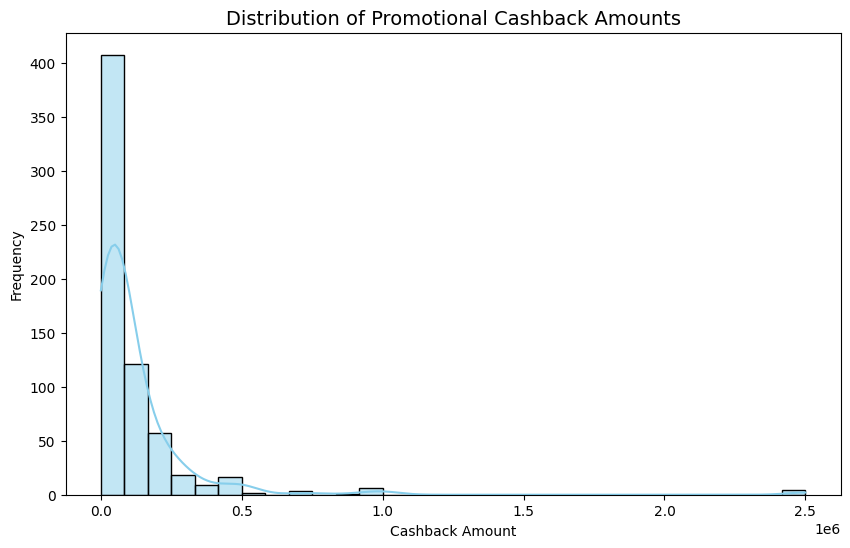

<ipython-input-9-e8409d46d097>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_promotions, x='promotion_code', y='usage_count', palette='viridis')


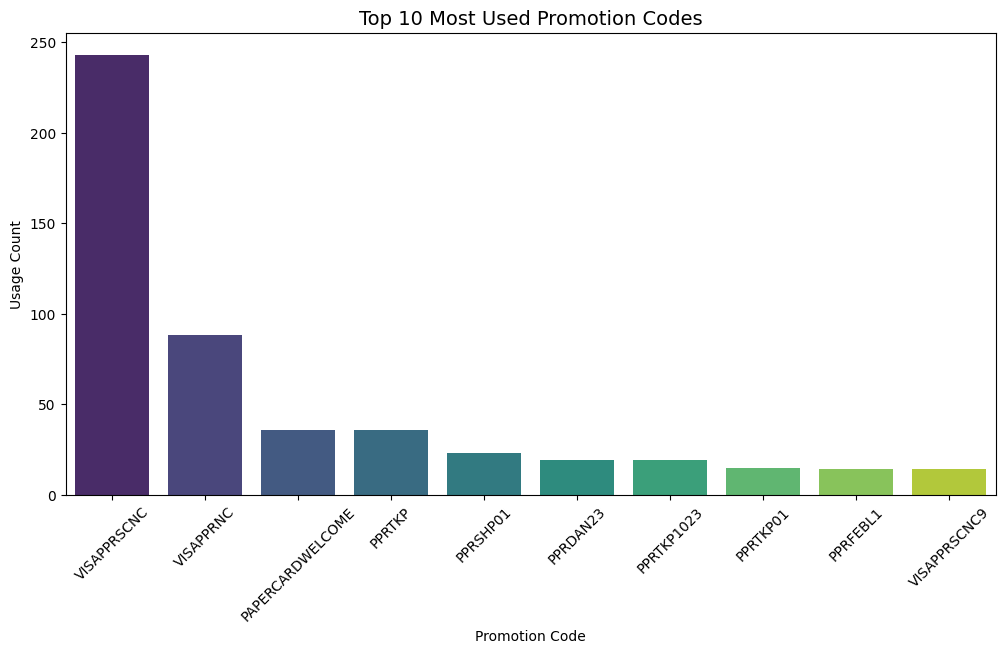

<ipython-input-9-e8409d46d097>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cashback_promotions, x='promotion_code', y='total_cashback', palette='magma')


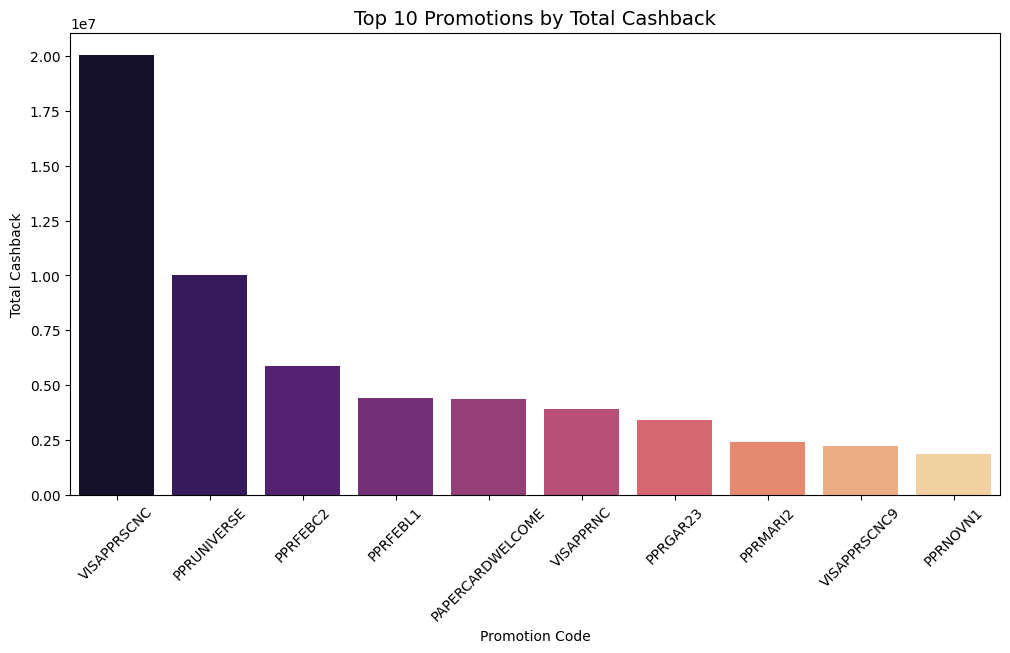

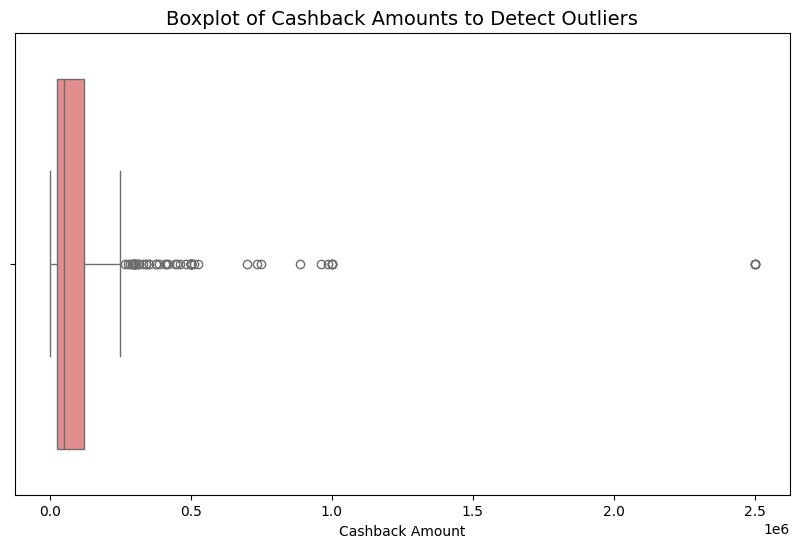

Potential Misuse Cases (Outliers):
                                      dpt_promotion_id    promotion_code  \
3    877cbc48ac832c9f872a12d06d949376f0d918ad48868d...          PPRMAYN2   
4    0a77054fc75a9d6dbb33ae4be6e3420e557715ef8c3a2a...          PPRMARF1   
12   0637b376c44d6c27b5f716b819fe330812b7727e37abec...          PPRFEBL1   
16   da78183844e6f3eecede6a09f73b1d81e5c393f3a2e702...          PPRAPRV1   
23   120dcee187609f10c0be940079d024c8041072fcb2e288...          PPRNOVS2   
29   92eb0e2ec24e64a91e40062bfdc2636e3452641f577c93...          PPRFEBC2   
46   35f36305f75d6878d2faef1d65872b3110d2cc67308839...       VISAPPRSCNC   
57   b9c5744f4fec8ccfd677a36a38081a050b122c071ae06b...       VISAPPRSCCO   
77   4b90ab1eb4bc4f5315c290566c5af22dc63ca6220ed969...          PPRMARI2   
82   b9c5744f4fec8ccfd677a36a38081a050b122c071ae06b...       VISAPPRSCCO   
83   0637b376c44d6c27b5f716b819fe330812b7727e37abec...          PPRFEBL1   
95   92eb0e2ec24e64a91e40062bfdc2636e3452641f577c93..

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ringkasan Data Promosi
df3_summary = df3.groupby('promotion_code').agg(
    total_cashback=('transaction_promo_cashback_amount', 'sum'),
    usage_count=('promotion_code', 'count'),
    avg_cashback=('transaction_promo_cashback_amount', 'mean')
).reset_index()

# 2. Visualisasi Distribusi Cashback
plt.figure(figsize=(10, 6))
sns.histplot(df3['transaction_promo_cashback_amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Promotional Cashback Amounts', fontsize=14)
plt.xlabel('Cashback Amount')
plt.ylabel('Frequency')
plt.show()

# 3. Visualisasi Frekuensi Penggunaan Kode Promosi
top_promotions = df3_summary.nlargest(10, 'usage_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_promotions, x='promotion_code', y='usage_count', palette='viridis')
plt.title('Top 10 Most Used Promotion Codes', fontsize=14)
plt.xlabel('Promotion Code')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()

# 4. Visualisasi Cashback Ekstrem
top_cashback_promotions = df3_summary.nlargest(10, 'total_cashback')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cashback_promotions, x='promotion_code', y='total_cashback', palette='magma')
plt.title('Top 10 Promotions by Total Cashback', fontsize=14)
plt.xlabel('Promotion Code')
plt.ylabel('Total Cashback')
plt.xticks(rotation=45)
plt.show()

# 5. Identifikasi Pola Penyalahgunaan (Outlier)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3, x='transaction_promo_cashback_amount', color='lightcoral')
plt.title('Boxplot of Cashback Amounts to Detect Outliers', fontsize=14)
plt.xlabel('Cashback Amount')
plt.show()

# 6. Tampilkan Data Outlier
q1 = df3['transaction_promo_cashback_amount'].quantile(0.25)
q3 = df3['transaction_promo_cashback_amount'].quantile(0.75)
iqr = q3 - q1
outliers = df3[(df3['transaction_promo_cashback_amount'] < (q1 - 1.5 * iqr)) |
               (df3['transaction_promo_cashback_amount'] > (q3 + 1.5 * iqr))]
print("Potential Misuse Cases (Outliers):")
print(outliers)
